# Задача 1

С изображениями из директории (https://drive.google.com/drive/folders/1sPwKGt_BX0fwGFTwVcoC7opwLT41b9Ug?usp=sharing)
1. Реализуйте загрузку изображений из директории применив трансформации изменения размера изображения, вращения и преобразования изображения в тензор.
2. Создайте DataLoader, задайте batch_size = 16 с перемешиванием данных.
3. Распечатайте shape и метки первых 10 изображений в датасете
4. Распечатайте shape и метки первых 10 изображений в датасете путем создания подмножества Subset
5. Распечатайте индексы, shape и метки для первых 10 изображений с использованием enumerate(dataset)
6. Разбейте данные на тренировочную и тестовую выборки в отншении 0.7 и 0.3 соответственно и распечатайте первые 5 меток из каждой выборки

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset, random_split

# Определяем путь к датасету
data_dir = "/content/drive/MyDrive/3 курс/2 семестр /Машинное зрение /4/"

# Определяем трансформации
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(), # Аугментация (отражение)
    transforms.RandomRotation(10), # Аугментация (случайный поворот)
    transforms.Resize((224, 224)),  # Изменение размера изображения
    transforms.ToTensor(),          # Преобразование в тензор
    transforms.Normalize(           # Нормализация
        mean=[0.485, 0.456, 0.406], # Средние значения для RGB
        std=[0.229, 0.224, 0.225]   # Стандартные отклонения для RGB
    )
])

dataset = datasets.ImageFolder(root=data_dir, transform=transform)

batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Получаем первые 10 изображений и их метки
first_batch = next(iter(dataloader))
images, labels = first_batch

print("Shape первых 10 изображений:", images[:10].shape)
print("Метки первых 10 изображений:", labels[:10])

# Распечатайте shape и метки первых 10 изображений в датасете путем создания подмножества Subset
subset = Subset(dataset, range(10))
subset_loader = DataLoader(subset, batch_size=10, shuffle=False)
subset_images, subset_labels = next(iter(subset_loader))

print("\nSubset - Shape первых 10 изображений:", subset_images.shape)
print("Subset - Метки первых 10 изображений:", subset_labels)

# Используем enumerate(dataset) для вывода индексов, shape и меток первых 10 изображений
for idx, (img, label) in enumerate(dataset):
    if idx >= 10:
        break
    print(f"Индекс: {idx}, Shape: {img.shape}, Метка: {label}")

# Разделяем dataset
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_labels = [train_dataset[i][1] for i in range(5)]
test_labels = [test_dataset[i][1] for i in range(5)]

print("\nПервые 5 меток из train-выборки:", train_labels)
print("Первые 5 меток из test-выборки:", test_labels)


Shape первых 10 изображений: torch.Size([10, 3, 224, 224])
Метки первых 10 изображений: tensor([3, 1, 0, 0, 0, 1, 1, 1, 1, 3])

Subset - Shape первых 10 изображений: torch.Size([10, 3, 224, 224])
Subset - Метки первых 10 изображений: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Индекс: 0, Shape: torch.Size([3, 224, 224]), Метка: 0
Индекс: 1, Shape: torch.Size([3, 224, 224]), Метка: 0
Индекс: 2, Shape: torch.Size([3, 224, 224]), Метка: 0
Индекс: 3, Shape: torch.Size([3, 224, 224]), Метка: 0
Индекс: 4, Shape: torch.Size([3, 224, 224]), Метка: 0
Индекс: 5, Shape: torch.Size([3, 224, 224]), Метка: 0
Индекс: 6, Shape: torch.Size([3, 224, 224]), Метка: 0
Индекс: 7, Shape: torch.Size([3, 224, 224]), Метка: 0
Индекс: 8, Shape: torch.Size([3, 224, 224]), Метка: 0
Индекс: 9, Shape: torch.Size([3, 224, 224]), Метка: 0

Первые 5 меток из train-выборки: [0, 4, 1, 4, 1]
Первые 5 меток из test-выборки: [1, 4, 4, 0, 4]


# Задача 2

С изображениями из директории (https://drive.google.com/drive/folders/1sPwKGt_BX0fwGFTwVcoC7opwLT41b9Ug?usp=sharing) сделайте вывод одного батча изображений (batch_size=16) с названиями класса на каждом изображении

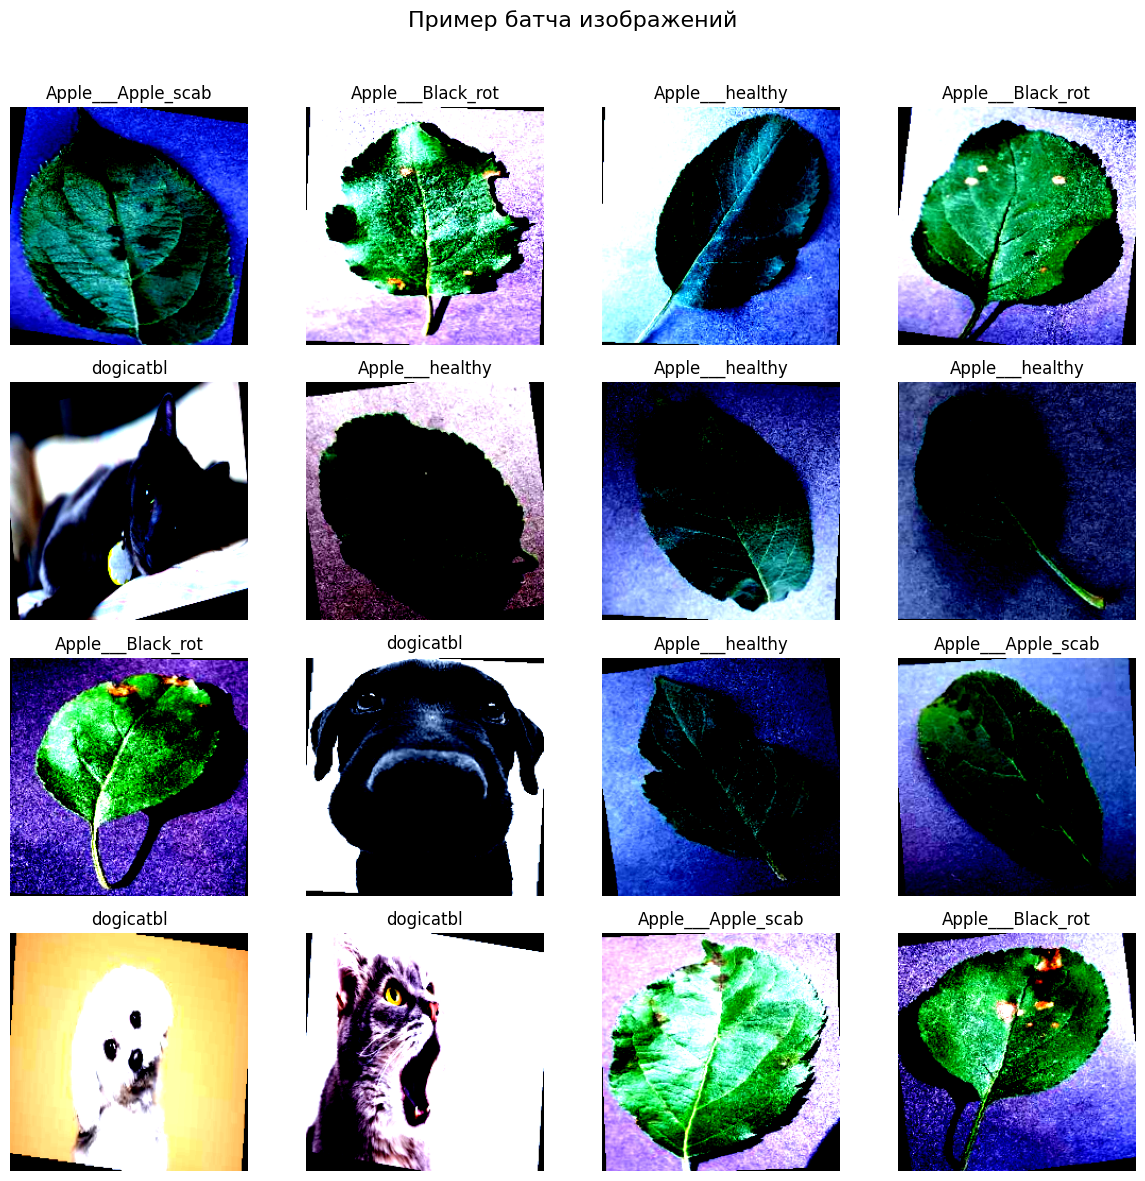

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Получаем один батч изображений
batch_images, batch_labels = next(iter(dataloader))

class_names = dataset.classes  # ['Apple_Apple_scab', 'Apple_Black_rot', 'Apple_Cedar_apple_rust', 'Apple_healthy']

fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # 4x4 сетка
fig.suptitle("Пример батча изображений", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i >= len(batch_images):
        break

    img = batch_images[i].permute(1, 2, 0).numpy()
    img = np.clip(img, 0, 1)

    label = batch_labels[i].item()
    ax.imshow(img)
    ax.set_title(class_names[label], fontsize=12)
    ax.axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Подгоняем макет, оставляя место для заголовка
plt.show()


# Задача 3

Создайте кастомный класс для загрузки данных из [директории](https://drive.google.com/drive/folders/1r0PvRCsrqBpRe6bj1aw8bLwkEfAbC9lo?usp=sharing). Вывести размер датасета и вывести изображение с id = 200.

Размер датасета: 697


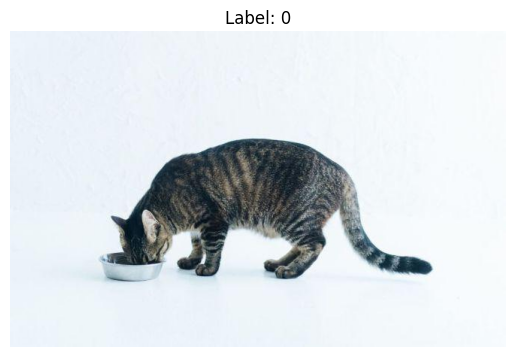

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torchvision import datasets
from torchvision.transforms import ToTensor

class CustomDatasetLoader:
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.train_dir = os.path.join(root_dir, 'train')
        self.test_dir = os.path.join(root_dir, 'test')

        self.train_data = datasets.ImageFolder(self.train_dir, transform=ToTensor())
        self.test_data = datasets.ImageFolder(self.test_dir, transform=ToTensor())

        self.all_data = self.train_data + self.test_data

    def dataset_size(self):
        return len(self.all_data)

    def show_image_by_id(self, image_id):
        img, label = self.all_data[image_id]
        img = img.permute(1, 2, 0).numpy()

        plt.imshow(img)
        plt.title(f"Label: {label}")
        plt.axis('off')
        plt.show()

dataset_loader = CustomDatasetLoader('/content/drive/MyDrive/3 курс/2 семестр /Машинное зрение /4/dogicatbl')

print(f"Размер датасета: {dataset_loader.dataset_size()}")

# Показываем изображение с id = 200
dataset_loader.show_image_by_id(200)
